# Daegu Apartment

Capstone Project Modul 3 - Dyandra Prakasita - JCDSOL21 Purwadhika

[Sumber Data Daegu Apartment](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx)

### **Contents**

1. Business Problem
2. Data Understanding
3. Data Cleaning, Feature Selection, & Feature Engineering
4. Analytics (Algorithm, Evaluation Metrics)
5. Conclusion
6. Recommendation

****

### Business Problem

**Context**

Populasi yang meningkat dengan jumlah luas tanah yang terbatas menjadi salah satu alasan munculnya masalah kebutuhan perumahan di dunia modern. Maka dari itu, diperlukan solusi untuk mengatasi kebutuhan rumah yang meningkat dan salah satu solusinya adalah membuat rumah bertingkat atau apartemen. Sama halnya seperti bisnis lain, value atau nilai apartemen dipengaruhi dengan lingkungan tempatnya berada dan kesesuaiannya dengan kebutuhan hidup, baik yang belum berkeluarga maupun yang sudah berkeluarga.

Umumnya, individu atau perusahaan pemilik unit apartemen akan memasarkan unit yang mereka miliki melalui platform pilihan mereka. Di situ pun mereka dapat menentukan harga yang akan mereka pasang. Tentunya, menentukan harga tidak semudah itu karena bila memasang di atas harga pasar maka sulit untuk menjual unitnya, sedangkan jika di bawah harga pasar maka tidak dapat memaksimalkan untung.

**Problem Statement**

Meski kebebasan menentukan harga menjadi nilai tambah bagi individu maupun perusahaan pemilik unit, akan sulit menentukan harga yang tepat sasaran. Berbagai faktor internal maupun eksternal seperti lokasi dan fasilitas yang disediakan oleh apartemen menjadi tolak ukur harga unit. Maka dari itu, diperlukan analisa harga pasar berdasarkan lokasi dan fasilitas apartemen.

**Goals**

Analisis dilakukan dengan tujuan menentukan harga jual unit apartemen yang kompetitif sesuai fasilitas yang disediakan dan tetap mendapatkan keuntungan maksimal.

**Audience**

Analisis ini ditujukan untuk individu maupun perusahaan sebagai realty/property investor yang hendak memasarkan unit apartemen mereka.

**Analytic Approach**

Untuk memaksimalkan untung dan tetap memiliki daya saing di pasar, maka diperlukan analisis mengenai faktor-faktor apa saja yang dapat mempengaruhi harga penjualan, serta prediksi/perkiraan harga berdasarkan faktor-faktor tersebut. Menggunakan model regresi, dapat ditemukan pola-pola yang membentuk harga unit apartemen di pasar sehingga hal ini dapat dijadikan sebagai alat/patokan bagi pemilik unit dalam menjual unit mereka.

**Metric Evaluation**

Evaluasi metrik yang kita gunakan adalah MAE (Mean Absolute Error), MSE (Mean Squared Error), dan RMSE (Root Mean Squared Error). MAE adalah rata-rata selisih absolut dari nilai aktual dan prediksi, MSE adalah rata-rata kuadrat selisih untuk melihat outlier, dan RMSE adalah akar dari MSE.

Selain itu juga menggunakan R-squared, adjusted R-squared dan dan MAPE dimana R-squared digunakan untuk melihat seberapa baik model menjelaskan persebaran target. Adjusted R-squared untuk melihat kesesuaian jumlah fitur yang digunakan model. Sedangkan MAPE (Mean Absolute Percentage Error) untuk menyatakan error dalam bentuk persentase.

### Data Understanding

Dataset merupakan list apartemen di Daegu dengan keterangan kolom sebagai berikut:

| **Nama Kolom** | **Keterangan** |
| --- | --- |
| Hallway Type | Apartment type |
| TimeToSubway | Waktu yang dibutuhkan untuk ke stasiun subway terdekat |
| SubwayStation | Nama stasiun subway terdekat |
| N_FacilitiesNearBy(ETC) | Jumlah fasilitas dekat apartemen |
| N_FacilitiesNearBy(PublicOffice) | Jumlah fasilitas kantor publik dekat apartemen |
| N_SchoolNearBy(University) | Jumlah universitas dekat apartemen |
| N_Parkinglot(Basement) | Jumlah parkir yang tersedia |
| YearBuilt | Tahun pembangunan apartemen |
| N_FacilitiesInApt | Jumlah fasilitas di dalam apartemen |
| Size(sqft) | Luas apartemen (in square feet) |
| SalePrice | Harga apartemen (Won) |

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset load

df = pd.read_csv('data_daegu_apartment.csv')

df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


#### Exploratory Data Analysis

**Distribusi Harga Apartemen di Daegu**

<Figure size 600x600 with 0 Axes>

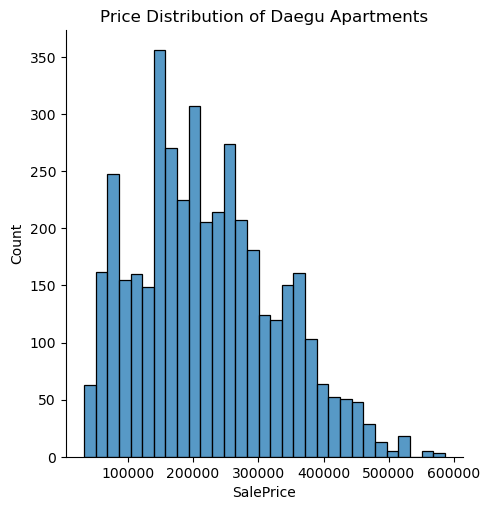

In [4]:
plt.figure(figsize=(6,6))
sns.displot(df['SalePrice'])
plt.title('Price Distribution of Daegu Apartments')
plt.show()

Berdasarkan diagram di atas, dapat terlihat bahwa ada persebaran data yang tidak normal dimana membentuk right-skewed distribution atau positive-skewed.

**Jumlah Unit per Kategori**

In [5]:
# Jumlah unit berdasarkan HallwayType, Subway terdekat, dan jarak tempuh ke stasiun terdekat
print(df['HallwayType'].value_counts())
print(f'\n{df['SubwayStation'].value_counts()}')
print(f'\n{df['TimeToSubway'].value_counts()}')

HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64


Dapat disimpulkan bahwa mayoritas apartemen bertipe terraced. Lokasi paling banyak terdapat di dekat stasiun Kyungbuk Uni Hospital, dan jarak tempuh mayoritas apartemen terhadap stasiun subway terdekat adalah 0-5 menit.

In [6]:
# Grouping berdasarkan tipe hallway, stasiun terdekat, dan jarak tempuhnya
df.groupby(['HallwayType', 'SubwayStation', 'TimeToSubway'])['TimeToSubway'].value_counts().sort_values(ascending=False)

HallwayType  SubwayStation          TimeToSubway      
terraced     Kyungbuk_uni_hospital  0-5min                742
mixed        Myung-duk              15min~20min           555
             Bangoge                5min~10min            502
terraced     Banwoldang             0-5min                479
             Sin-nam                0-5min                416
             Kyungbuk_uni_hospital  10min~15min           361
             Myung-duk              0-5min                267
corridor     Myung-duk              10min~15min           222
terraced     no_subway_nearby       no_bus_stop_nearby    171
                                    5min~10min             78
mixed        Chil-sung-market       15min~20min            74
corridor     Daegu                  5min~10min             51
             Sin-nam                5min~10min             51
             Banwoldang             5min~10min             50
             Kyungbuk_uni_hospital  0-5min                 49
             no

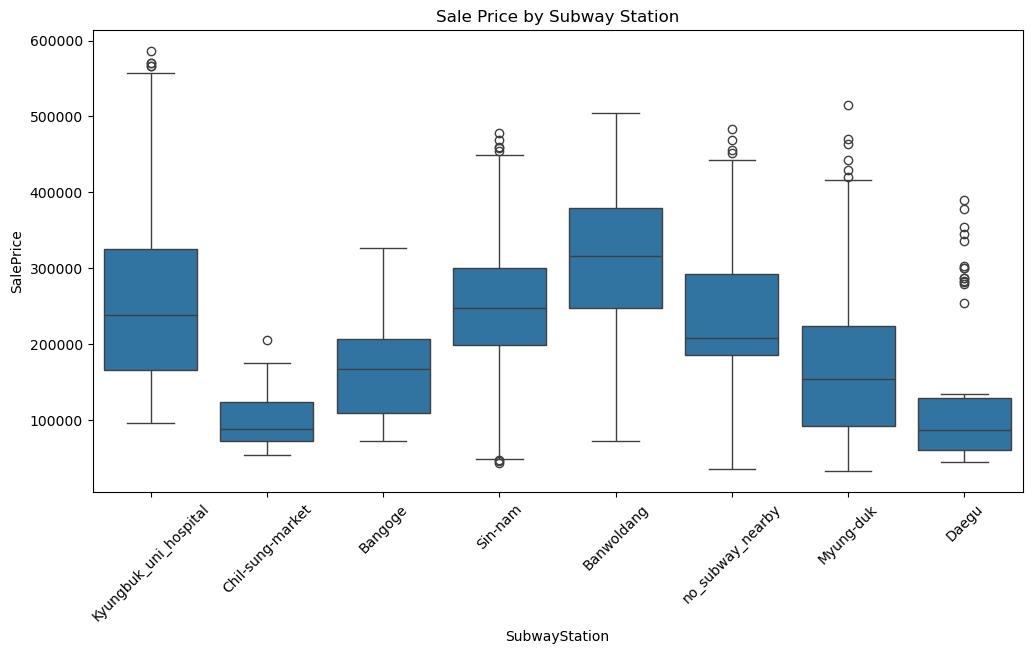

In [7]:
# Distribusi harga berdasarkan stasiun terdekat

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SubwayStation', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Sale Price by Subway Station')
plt.show()

Dari boxplot terlihat bahwa median harga tertinggi apartemen adalah yang dekat Stasiun Banwoldang.

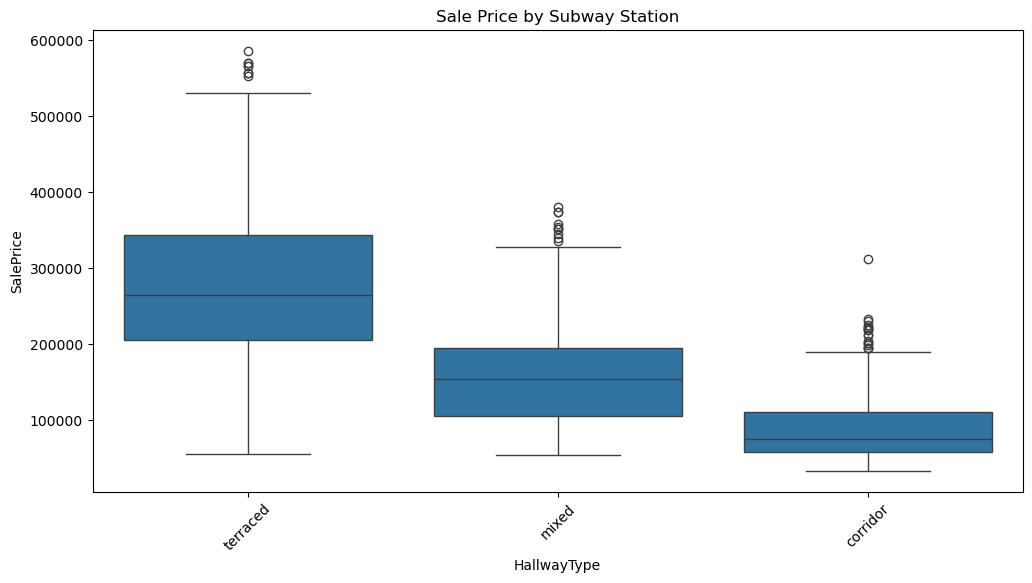

In [8]:
# Distribusi harga berdasarkan Hallway Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='HallwayType', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Sale Price by Subway Station')
plt.show()

Jika dilihat dari tipe hallway apartemennya, maka range dan median harga tertinggi dapat dilihat pada tipe apartemen Terraced.

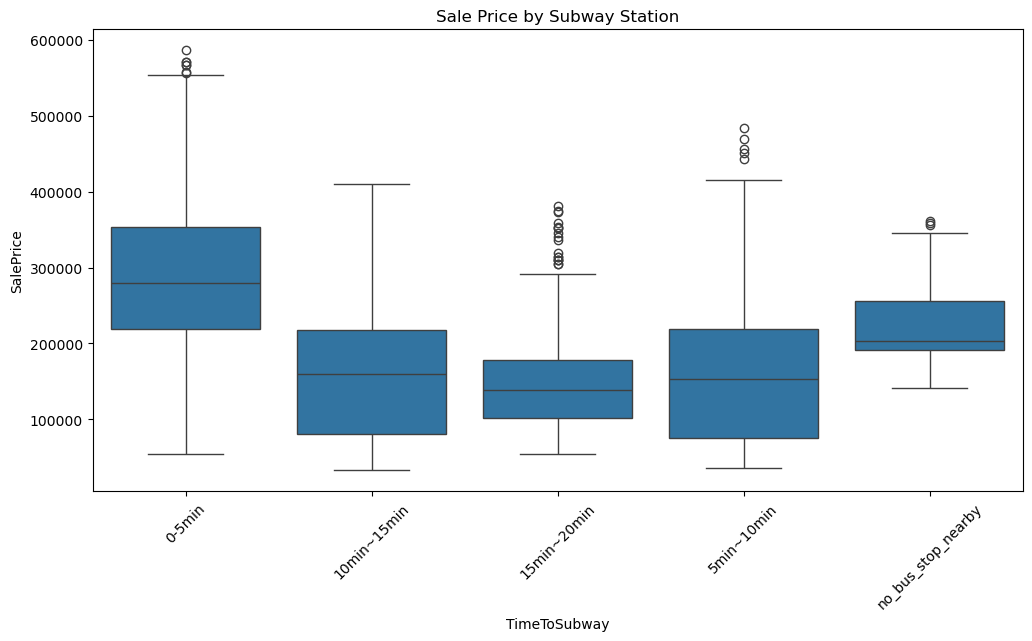

In [9]:
# Distribusi harga berdasarkan Jarak Tempuh ke Stasiun
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TimeToSubway', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Sale Price by Subway Station')
plt.show()

Berdasarkan jarak tempuhnya, dapat dilihat bahwa semakin dekat (jarak 0-5 menit) maka harganya semakin mahal. Adapun jarak 5-10 menit dengan 10-15 menit relatif tidak berbeda. Meski begitu, terdapat pengecualian untuk apartemen tanpa bus stop/stasiun terdekat justru menunjukkan range harga yang tinggi. Hal ini dapat dikaitkan dengan kemungkinan lokasi apartemen yang strategis (di pusat kota) atau ukuran unit yang besar.

In [10]:
# Median harga apartemen
df_med_price = df.groupby(['HallwayType', 'SubwayStation', 'TimeToSubway']).agg({'SalePrice':'median'}
                                                                               ).sort_values(by='SalePrice', ascending=False).reset_index()

df_med_price

,HallwayType,SubwayStation,TimeToSubway,SalePrice
0,terraced,no_subway_nearby,5min~10min,376769.5
1,terraced,Banwoldang,0-5min,337168.0
2,terraced,Daegu,5min~10min,300884.0
3,terraced,Myung-duk,0-5min,271681.0
4,terraced,Kyungbuk_uni_hospital,0-5min,265486.0
5,terraced,Sin-nam,0-5min,256637.0
6,terraced,no_subway_nearby,no_bus_stop_nearby,203646.0
7,terraced,Kyungbuk_uni_hospital,10min~15min,203539.0
8,mixed,Bangoge,5min~10min,167035.0
9,corridor,Kyungbuk_uni_hospital,0-5min,163716.0


### Data Cleaning, Feature Selection, & Feature Engineering

**Treatment Data Null dan Duplikat**

In [11]:
# Duplikasi dataframe
df_dup = df.copy()

# Cek jumlah data duplikat dan null
print(f'Jumlah null:\n{df_dup.isnull().sum()}')
print(f'\nJumlah duplikat: {df_dup.duplicated().sum()}')

df_dup[df_dup.duplicated()].head()

Jumlah null:
HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Jumlah duplikat: 1422


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141


Secara domain knowledge, semua kolom yang terdapat dalam dataset ini berpengaruh terhadap prediksi harga namun akan diuji lebih jauh menggunakan **uji korelasi**.

Jumlah null sudah 0, namun jumlah data duplikat terdeteksi tinggi. Ini dapat disebabkan karena tidak ada unique identifier sehingga banyak kolom yang seharusnya unik namun dianggap duplikat. Untuk itu, saya memilih tidak menghapus/drop data duplikat.

In [12]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [13]:
# Cek Statistik Deskriptif data numerik

data_num = [i for i in df_dup.columns if df_dup[i].dtype != 'object']
df_dup[data_num].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


Fitur jumlah parkir tersedia menunjukkan angka terkecil di 0, artinya terdapat apartemen yang tidak menyediakan area parkir.

Selain itu, tidak ada fitur yang menunjukkan angka 0 sehingga bisa dilakukan **deteksi outlier** untuk pembersihan lebih lanjut.

**Uji Korelasi**

Di awal sudah diperiksa bahwa persebaran data sales price tidak normal (right-skewed/positive-skewed) maka digunakan metode uji korelasi Spearman.

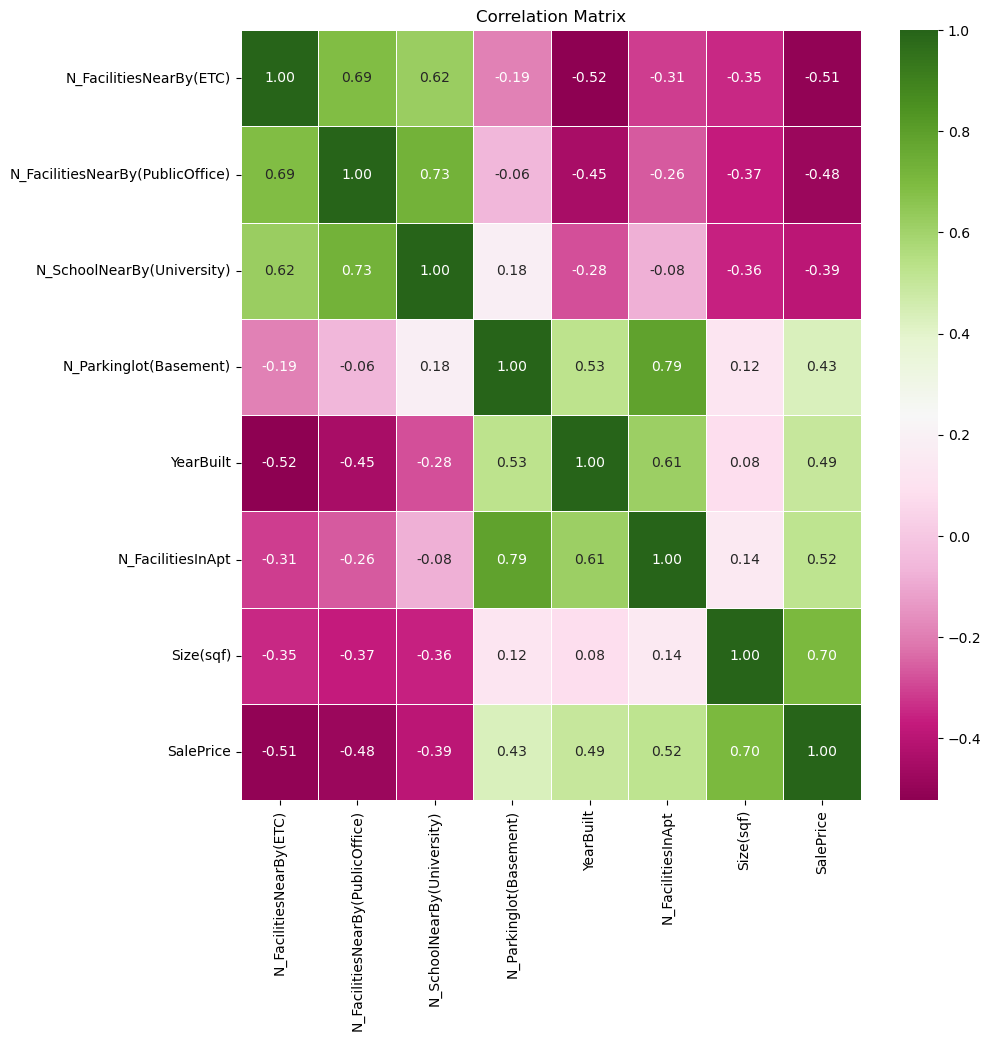

In [14]:
# Correlation Matrix

plt.figure(figsize=(10,10))
corr = df_dup.select_dtypes(include='number').corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='PiYG', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Dari matriks korelasi di atas, terlihat bahwa semua fitur berkorelasi sedang hingga tinggi, baik secara positif maupun negatif terhadap harga. Luas apartemen, jumlah fasilitas di apartemen, tahun dibangun, dan jumlah parkir menunjukkan korelasi positif. Artinya, semakin luas bangunan, semakin banyak fasilitas dalam apartemen, semakin banyak parkir tersedia, dan semakin baru bangunannya maka semakin mahal harga apartemen.

Sebaliknya, jumlah fasilitas terdekat, kantor publik, dan sekolah/universitas terdekat berkorelasi negatif terhadap harga. Artinya, semakin banyak fasilitas tersebut, semakin rendah harganya. Hal ini bisa terjadi jika apartemen yang berlokasi di dekat universitas memiliki target pasar menengan (mahasiswa) sehingga diberikan harga yang lebih rendah.

**Outliers Detection**

<Axes: >

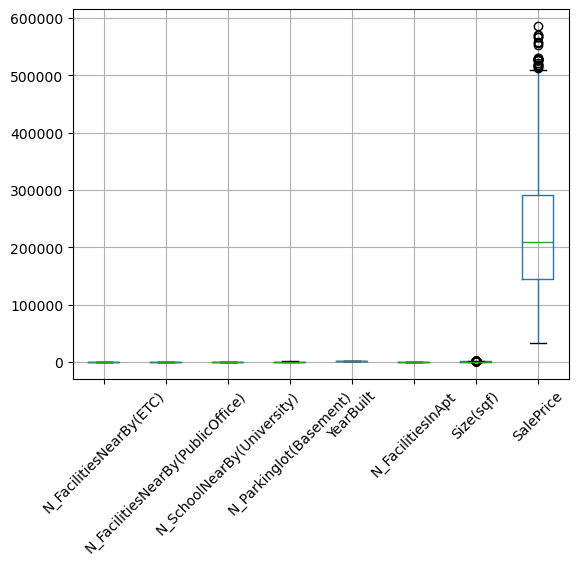

In [15]:
df_dup.boxplot(rot=45)

Dari boxplot di atas dapat dilihat bahwa hanya terdapat outlier pada fitur luas apartemen dan harga penjualan. Maka kedua fitur itu akan kita cari outliersnya.

In [16]:
# Rumus outlier
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    limit_atas = q3 + 1.5*IQR
    limit_bawah = q1 - 1.5*IQR
    print(f'IQR: {IQR}')
    print(f'Limit atas adalah: {limit_atas}')
    print(f'Limit bawah adalah: {limit_bawah}')

In [17]:
# Cari outlier Sale Price

outlier(df_dup['SalePrice'])

IQR: 146398.0
Limit atas adalah: 510747.0
Limit bawah adalah: -74845.0


In [18]:
# Cari outlier luas apartemen

outlier(df_dup['Size(sqf)'])

IQR: 505.0
Limit atas adalah: 1906.5
Limit bawah adalah: -113.5


In [19]:
# Jumlah data outlier

print(f'Jumlah data price outlier: {df_dup[df_dup['SalePrice'] > 510747].count()['SalePrice']}')
print(f'Jumlah data luas apt outlier: {df_dup[df_dup['Size(sqf)'] > 1906].count()['Size(sqf)']}')

Jumlah data price outlier: 27
Jumlah data luas apt outlier: 98


Jumlah tersebut masih jauh di bawah 5% dari keseluruhan data, maka dari itu saya memilih untuk drop data yang termasuk outlier karena jumlahnya tidak terlalu signifikan dibanding keseluruhan data. Namun, pembuangan data ini akan dicatat sebagai limitasi model nantinya.

In [20]:
# Drop data outlier

df_dup = df_dup[df_dup['SalePrice'] <= 510747]
df_dup = df_dup[df_dup['Size(sqf)'] <= 1906.5]

print(f'Statistik deskriptif Price:\n{df_dup['SalePrice'].describe()}')
print(f'\nSatistik deskriptif Luas:\n{df_dup['Size(sqf)'].describe()}')

Statistik deskriptif Price:
count      4015.000000
mean     217551.669988
std      103126.367493
min       32743.000000
25%      143362.000000
50%      207079.000000
75%      285840.000000
max      508849.000000
Name: SalePrice, dtype: float64

Satistik deskriptif Luas:
count    4015.000000
mean      925.216936
std       341.828592
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      1796.000000
Name: Size(sqf), dtype: float64


**Clean Dataset**

In [21]:
df_dup.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [22]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4015 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4015 non-null   object 
 1   TimeToSubway                      4015 non-null   object 
 2   SubwayStation                     4015 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4015 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4015 non-null   float64
 5   N_SchoolNearBy(University)        4015 non-null   float64
 6   N_Parkinglot(Basement)            4015 non-null   float64
 7   YearBuilt                         4015 non-null   int64  
 8   N_FacilitiesInApt                 4015 non-null   int64  
 9   Size(sqf)                         4015 non-null   int64  
 10  SalePrice                         4015 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 376.4+ KB


Data sudah siap digunakan untuk modeling.

### Modeling - Analytics (Algorithm, Evaluation Metrics)

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

**Encoding**

Data kategorikal seperti HallwayType, SubwayStation, dan TimeToSubway perlu dilakukan encoding agar dapat dimasukkan menjadi fitur model. Encoding menggunakan Column Transformer.

In [24]:
# Preprocessor kolom kategorikal dan numerik
preprocessor = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['HallwayType', 'SubwayStation', 'TimeToSubway']),
], remainder='passthrough')

**Train-Test Data Split**

In [25]:
y = df_dup['SalePrice']
X = df_dup.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Benchmark Model Selection**

Karena data tidak menunjukkan outlier extreme, maka analisa tidak menggunakan log transform.

In [26]:
# List model yang akan diuji
model_cek = {'Linear regression' : LinearRegression(), 
          'KNN Regressor' : KNeighborsRegressor(), 
          'Decision Tree Regressor' : DecisionTreeRegressor(random_state=22),
          'Random Forest Regression' : RandomForestRegressor(random_state=22),
          'XGB Regressor' : XGBRegressor(random_state=22)
            }

# Uji dengan cross validation
hasil_uji = []

for name, reg in model_cek.items():
    crval = KFold(n_splits=5, shuffle=True, random_state=22)
    
    pipeline_bm = Pipeline(steps=[
        ('Preprocess', preprocessor),
        ('Scaler', StandardScaler()),
        ('Regressor', reg)
    ])
    
    crval_rmse = cross_val_score(pipeline_bm, X, y, cv=crval, scoring='neg_root_mean_squared_error', n_jobs=-1)
    crval_mae = cross_val_score(pipeline_bm, X, y, cv=crval, scoring='neg_mean_absolute_error', n_jobs=-1)
    crval_r2 = cross_val_score(pipeline_bm, X, y, cv=crval, scoring='r2', n_jobs=-1)
    crval_mape = cross_val_score(pipeline_bm, X, y, cv=crval, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
    
    hasil_uji.append({
        'Regressor': name,
        'RMSE': crval_rmse.mean(),
        'MAE': crval_mae.mean(),
        'R2': crval_r2.mean(),
        'MAPE': crval_mape.mean()
    })

df_hasiluji = pd.DataFrame(hasil_uji)
df_hasiluji

,Regressor,RMSE,MAE,R2,MAPE
0,Linear regression,-49045.515347,-39830.025542,0.773498,-0.221866
1,KNN Regressor,-45479.245178,-35364.530660,0.805311,-0.199860
2,Decision Tree Regressor,-42026.288540,-33246.139846,0.833740,-0.182245
3,Random Forest Regression,-42049.824399,-33267.713767,0.833550,-0.182763
4,XGB Regressor,-42059.548438,-33264.102734,0.833472,-0.182622


Dari hasil cross-val di atas, dapat dilihat bahwa Decision Tree, Random Forest, dan XGB memiliki hasil MAE, RMSE, dan MAPE paling rendah yang artinya model ini memberikan error terkecil. Angka R-squared model tersebut juga yang paling tinggi dengan selisih yang tidak signifikan. Artinya model bisa menjelaskan paling banyak variabel dibandingkan model lainnya.

**Predict to Test Set**

In [27]:
model_ptt = {'Decision Tree Regressor' : DecisionTreeRegressor(random_state=22),
             'Random Forest Regression' : RandomForestRegressor(random_state=22),
             'XGB Regressor' : XGBRegressor(random_state=22)
            }

hasil_ptt = []

for name, reg in model_ptt.items():
    pipeline_ptt = Pipeline(steps=[
        ('Preprocess', preprocessor),
        ('Scaler', StandardScaler()),
        ('Regressor', reg)
    ])
    pipeline_ptt.fit(X_train, y_train)
    
    y_pred_ptt = pipeline_ptt.predict(X_test)
    
    ptt_rmse = math.sqrt(mean_squared_error(y_test, y_pred_ptt))
    ptt_mae = mean_absolute_error(y_test, y_pred_ptt)
    ptt_r2 = r2_score(y_test, y_pred_ptt)
    ptt_mape = mean_absolute_percentage_error(y_test, y_pred_ptt)
    ptt_adjr2 = 1 - (1 - ptt_r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)
    
    hasil_ptt.append({
        'Regressor': name,
        'RMSE': ptt_rmse,
        'MAE': ptt_mae,
        'R2': ptt_r2,
        'Adj R2': ptt_adjr2,
        'MAPE': ptt_mape
    })

df_hasilptt = pd.DataFrame(hasil_ptt)
df_hasilptt.sort_values(by='RMSE').reset_index(drop=True)

,Regressor,RMSE,MAE,R2,Adj R2,MAPE
0,Random Forest Regression,41688.207684,32657.075759,0.840157,0.838138,0.179129
1,XGB Regressor,41794.021391,32752.878906,0.839344,0.837316,0.179178
2,Decision Tree Regressor,41817.570494,32779.365860,0.839163,0.837132,0.179294


Berdasarkan hasil Predict to Test Set di atas, terlihat bahwa performa model Random Forest Regression merupakan yang paling baik di antara ketiga model tersebut. Nilai RMSE, MAE, dan MAPE model Random Forest merupakan yang paling kecil. Artinya, error prediksi model tersebut yang paling kecil dibanding model lain. Selanjutnya, nilai R2 dan adjusted R2 model Random Forest juga yang paling tinggi tanpa penurunan yang signifikan, menunjukkan bahwa model tersebut tidak underfit maupun overfit.

**Random Forest Hyperparameter tuning**

In [28]:
# Set parameter tuning
n_estimators = np.arange(100, 501, 20)
max_depth = np.arange(10, 30, 5)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

params_rf = {'regressor__n_estimators': n_estimators,
             'regressor__max_depth': max_depth,
             'regressor__min_samples_split': min_samples_split,
             'regressor__min_samples_leaf': min_samples_leaf,
             'regressor__bootstrap': bootstrap
            }
    
# Benchmark model RF 
rf = RandomForestRegressor(random_state=22)

pipeline_rf = Pipeline([
    ('preprocess', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', rf)
])

crval = KFold(n_splits=5, shuffle=True, random_state=22)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    pipeline_rf, 
    params_rf,
    n_iter = 50,
    cv = crval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', 
    random_state = 22
)

# Data Train fit
random_rf.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=22))])
,param_distributions,"{'regressor__bootstrap': [True, False], 'regressor__max_depth': array([10, 15, 20, 25]), 'regressor__min_samples_leaf': [1, 2], 'regressor__min_samples_split': [2, 5], ...}"
,n_iter,50
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,22
,error_score,nan


In [29]:
# Cek skor dan parameter terbaik
print('Random Forest')
print('Best RMSE score:', random_rf.best_score_)
print('Best parameters:', random_rf.best_params_)

Random Forest
Best RMSE score: -42191.3635151852
Best parameters: {'regressor__n_estimators': 400, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 15, 'regressor__bootstrap': True}


Setelah mendapatkan parameter terbaik di atas, kita bisa masukkan parameter tersebut ke dalam final model kita.

**Tuned Model - Predict to Test Set**

In [33]:
rft = RandomForestRegressor(n_estimators=400, 
                            min_samples_split=5, 
                            min_samples_leaf=1,
                            max_depth=15,
                            bootstrap=True,
                            random_state=22
                           )

pipeline_rft = Pipeline(steps=[
    ('Preprocess', preprocessor),
    ('Scaler', StandardScaler()),
    ('Regressor', rft)
])

pipeline_rft.fit(X_train, y_train)

y_pred_rft = pipeline_rft.predict(X_test)

# EValuasi metrics
eval_met = []

rft_rmse = math.sqrt(mean_squared_error(y_test, y_pred_rft))
rft_mae = mean_absolute_error(y_test, y_pred_rft)
rft_r2 = r2_score(y_test, y_pred_rft)
rft_mape = mean_absolute_percentage_error(y_test, y_pred_rft)
rft_adjr2 = 1 - (1 - rft_r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)

eval_met.append({
    'Regressor': 'Random Forest',
    'RMSE': rft_rmse,
    'MAE': rft_mae,
    'R2': rft_r2,
    'Adj R2': rft_adjr2,
    'MAPE': rft_mape
})

df_evalmet = pd.DataFrame(eval_met)

In [34]:
df_hasilptt[df_hasilptt['Regressor'] == 'Random Forest Regression']

,Regressor,RMSE,MAE,R2,Adj R2,MAPE
1,Random Forest Regression,41688.207684,32657.075759,0.840157,0.838138,0.179129


In [35]:
df_evalmet

,Regressor,RMSE,MAE,R2,Adj R2,MAPE
0,Random Forest,41686.322223,32623.336368,0.840171,0.838153,0.178832


Hasil tuning menunjukkan nilai RMSE, MAE, dan MAPE yang lebih kecil dibandingkan sebelum tuning meskipun penurunan sangat kecil.

- RMSE: Dari 41,688 ke 41,686 Won
- MAE: Dari 32,657 ke 32,623 Won
- MAPE: Dari 0.1791 ke 0.1788
- Selisih R2 dengan Adjusted R2 di model setelah tuning juga lebih sedikit, dibandingkan sebelum tuning.

**Visualisasi Prediksi vs Aktual**

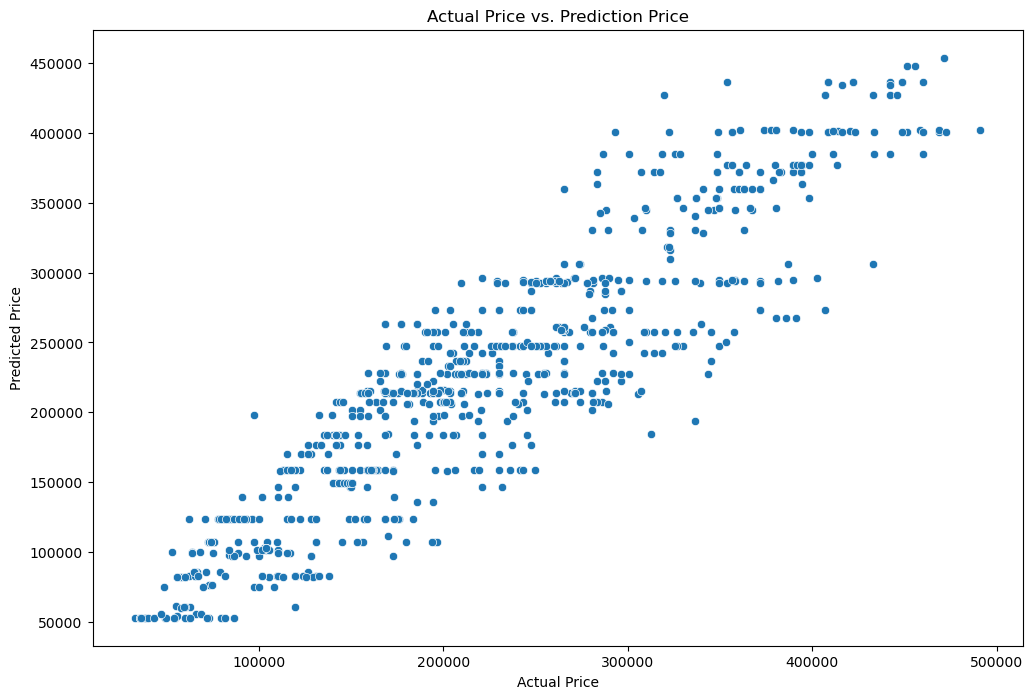

In [39]:
plt.figure(figsize=(12, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rft).set(title='Actual Price vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Dari scatterplot di atas, terlihat bahwa dalam range harga yang rendah model ini mampu mengikuti tren harga aktual dalam prediksinya. Namun, pada harga yang tinggi terlihat jarak antara harga aktual dan harga prediksi (error) yang cukup signifikan. Hal ini dapat disebabkan oleh:

- Limitasi model yang tidak menggunakan harga outlier dalam data yang diolah.
- Limitasi model berupa hyperparameter tuning menggunakan RandomizedSearchCV bukan GridSearchCV yang mencari secara acak, bukan mencoba seluruh grid data.

**Feature Importance**

In [43]:
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'passthrough':
            feature_names.extend(columns)
        elif hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
            feature_names.extend(names)
        else:
            feature_names.extend(columns)
    return feature_names

feature_names = get_feature_names(preprocessor)

importances = rft.feature_importances_

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_importances.head()

HallwayType_terraced       0.407585
Size(sqf)                  0.390565
YearBuilt                  0.093948
N_Parkinglot(Basement)     0.042827
N_FacilitiesNearBy(ETC)    0.023685
dtype: float64

### Conclusion & Recommendation

Dari pemodelan di atas dapat disimpulkan bahwa fitur yang **paling berpengaruh** terhadap harga adalah **Hallway tipe Terraced** dan **Size* atau luas apartemen.

Evaluasi metrik model dilakukan menggunakan nilai MAE, RMSE, R2, adjusted R2 dan MAPE. Selanjutnya, jika model ini digunakan untuk memprediksi harga apartemen di Daegu berdasarkan fitur-fitur tertentu, nilai error dari prediksinya sekitar 17% (MAPE) untuk rentang harga di bawah KRW 510,747. Namun seperti yang terlihat di scatterplot, model ini masih menunjukkan error prediksi yang cukup tinggi khususnya di rentang harga tinggi (> KRW 350,000).

Prediksi juga dapat error lebih jauh lagi karena limitasi model seperti pembuangan data outlier (harga tinggi), setting tuning hyperparameter yang masih menggunakan RandomizedSearchCV, dan dari segi data juga tidak memberikan informasi segmentasi antara hunian kelas menengah dengan hunian premium, atau kelas-kelas lainnya. Tentunya kelas hunian akan berpengaruh juga terhadap harga. Model dapat ditingkatkan dengan fine-tuning parameter lainnya serta menggunakan GridSearchCV agar data yang digunakan bukan hanya data acak.

**Save Model**

In [44]:
# # Save model
# import pickle

# rft = Pipeline([('preprocess', preprocessor), ('regressor', RandomForestRegressor())])
# rft.fit(X_train, y_train)

# pickle.dump(rft, open('Model_DaeguAPT_RF.sav', 'wb'))

In [45]:
# # Load model
# filename = 'Model_DaeguAPT_RF.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [51]:
# data_baru = pd.DataFrame({
#     'HallwayType': 'terraced',
#     'TimeToSubway': '0-5min',
#     'SubwayStation': 'Banwoldang',
#     'N_FacilitiesNearBy(ETC)': [4],
#     'N_FacilitiesNearBy(PublicOffice)': [1],
#     'N_SchoolNearBy(University)': [1],
#     'N_Parkinglot(Basement)': [0],
#     'YearBuilt': [2013],
#     'N_FacilitiesInApt': [3],
#     'Size(sqf)': [1387]
# })

# print(rft.predict(data_baru))
